<a href="https://colab.research.google.com/github/camocola/ADA-informes/blob/main/Informe10_Knapsack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema: Problema de la mochila**



Entrada: Dos arreglos de n elementos: $v=\left<v_1,v_2,...,v_n\right>$,  $p=\left<p_1,p_2,...,p_n\right>$. En donde el arreglo $v$ corresponde al valor de los objetos y el arreglo $p$ al peso de los objetos. 

$i$ el peso total que soporta la mochila. 

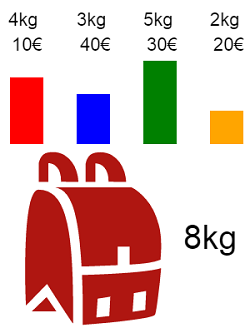

En el siguiente informe se analizará el **problema de la mochila**, el cual busca maximizar la ganancia obtenida y entregar la solución óptima de un conjunto limitado de posibles soluciones, obteniendo la mayor ganancia de los objetos pero sin exceder el peso de la mochila. Este prolema a simple vista se ve fácil de resolver, sin embargo genera complicaciones al ser generalmente presentado como un subproblema de un problema general.

Podemos resolver este problema con la programación dinámica, el cual es una solución para los problemas que deben resolver el mismo subproblema repetidas veces. El algoritmo resuelve un subproblema una vez y lo almacena en una tabla, para así evitar calcular subproblemas ya resueltos anteriormente.



# **2. Código**

El siguiente código muestra una implementación del algoritmo de **programación dinámica (bottom-up)** y una implementación del algoritmo **greedy** para resolver el problema de la mochila.

### Impresora de matrices

In [40]:
from termcolor import colored
def Mostrar(matriz, m):
    print(f"Tabla obtenida:")
    for fila in matriz:
        for valor in fila:
          if (valor != 0 and valor != m):
            print("\t", colored(valor, 'cyan'), end=" ")
          elif (valor == m):
            print("\t",colored(valor, 'yellow'), end=" ")
          else:
            print("\t",colored(valor, 'magenta'), end=" ")
        print()

## Knapsack dinámico (bottom-up)

In [36]:
import numpy as np
# peso es el peso que soporta la mochila
# po es el peso de cada objeto
# precio es el precio de cada objeto
# n es el largo

def dynamicKnapSack(peso, po, precio, n, cont, verbose = False):
  # Tabla que almacena los subproblemas
  tabla = [[0 for x in range(peso + 1)] for x in range(n + 1)]

  # Se empieza a recorrer la tabla
  for i in range(n + 1):
    for j in range(peso + 1):
      cont[0] += 1
      # Si se encuentra en la posición 0 es un objeto nulo, por lo que se inicializa en 0
      if (i == 0 or j == 0):
        if (verbose == True):
          print(f"Caso base, por lo cual tab[{i}][{j}] = 0\n")
        tabla[i][j] = 0
      # Si el peso actual es menor o igual a la capacidad, se puede considerar la solución del caso anterior o la solución del caso anterior + el valor del objeto actual
      elif (po[i-1] <= j):
        if (verbose == True):
          print(f"Valor máximo obtenido de: {colored(precio[i-1] + tabla[i-1][j-po[i-1]], 'yellow')} y {colored(tabla[i-1][j], 'yellow')}...")
        tabla[i][j] = max(precio[i-1] + tabla[i-1][j-po[i-1]], tabla[i-1][j])
        if (verbose == True):
          print(f"El valor máximo se almacena en tab[{i}][{j}] = {colored(tabla[i][j], 'green')}\n")
      # Si el peso actual es mayor que la capacidad máxima se toma la solución anterior
      else:
        if (verbose == True):
          print(f"El objeto {colored(po[i-1], 'magenta')} > {colored(j, 'magenta')} no cabe en la mochila, por lo que tomamos la solución anterior tab[{i-1}][{j}]: {colored(tabla[i-1][j], 'cyan')}\n")
        tabla[i][j] = tabla[i-1][j]
    if(verbose == True):
      print()   

  if (verbose == True):
    print(f"El valor máximo obtenido se encuentra almacenado en = tabla[{n}][{peso}]")
    Mostrar(tabla, tabla[n][peso])
    print(f"Valor máximo obtenido = {colored(tabla[n][peso], 'green')}")
  return tabla[n][peso]

#Ejemplo
precio = [50, 100, 150]
po = [10, 20, 30]
peso = 50
n = len(precio)
cont = [0]
maximo = dynamicKnapSack(peso, po, precio, n, cont)
print("El mayor valor encontrado es:", maximo)
print("Cantidad de subproblemas resueltos:", cont[0])

El mayor valor encontrado es: 250
Cantidad de subproblemas resueltos: 204


## Knapsack *greedy*

In [31]:
import math
from termcolor import colored

# Clase sacada de https://www.geeksforgeeks.org/fractional-knapsack-problem/?ref=rp
class Item:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight

def greedyKnapSack(peso, po, precio, n, cont, verbose = False):
  if (verbose == True):
    print("Datos de entrada...")
    print(f"Arreglo de precios: {colored(precio, 'magenta')}")
    print(f"Arreglo de pesos: {colored(po, 'green')}")
    print(f"Capacidad máxima de la mochila: {colored(peso, 'blue')}\n")
  # Creamos un diccionario con clave precio y valor peso
  diccionario = {}
  for i in range(n):
    diccionario[precio[i]] = po[i]
  
  # Transformamos el diccionario en una tupla y los objetos son de clase Item
  diccionario = [Item(a, b) for a, b in diccionario.items()]
  
  # Se ordena la tupla de mayor a menor en proporcion precio/valor.
  diccionario.sort(key=lambda x: (x.value/x.weight), reverse=True)

  # Valor máximo almacenado
  maximo = 0

  # Recorremos todo los objetos
  for i in diccionario:
    cont[0] += 1
    # Si el objeto cabe en la mochila
    if i.weight <= peso:
      maximo += i.value
      peso -= i.weight
      if (verbose == True):
        print("Comparando el peso del objeto actual con la capacidad máxima de la mochila...")
        print(f"El objeto cabe en la mochila: {colored(i.weight, 'yellow')} <= {colored(peso+i.weight, 'yellow')}")
        print(f"La ganancia máxima actual es: {colored(maximo, 'cyan')}")
        print(f"La capacidad actual de la mochila es: {colored(peso, 'red')}\n")
    else:
      if (verbose == True):
        print(f"El objeto no cabe en la mochila: {colored(i.weight, 'yellow')} > {colored(peso, 'yellow')}\n")

  # Retornamos el máximo
  if(verbose == True):
    print(f"La ganancia máxima obtenida es: {colored(maximo, 'green')}")
  return maximo

#Ejemplo
precio = [50, 100, 150]
po = [10, 20, 30]
peso = 50
n = len(precio)
cont = [0]
maximo = greedyKnapSack(peso, po, precio, n, cont)
print("El mayor valor encontrado es:", maximo)
print("Cantidad de iteraciones:", cont[0])

El mayor valor encontrado es: 150
Cantidad de iteraciones: 3


## 2.2. Descripción del algoritmo

Valores de entrada de ambos algoritmos:

$peso$: es el peso máximo que soporta la mochila. 

$po$: es un arreglo de pesos de cada objeto individual. 

$precio$: es un arreglo de precios de cada objeto. 

$n$: es el largo del arreglo de precios. 

$cont$: contador de subproblemas (programación dinámica) / contador de subproblemas (greedy).

$verbose$: permite visualizar paso a paso el algoritmo.


### Knapsack **dinámico**

**Subestructura óptima**

$$
m[i, p] = \left\{ 
\begin{array}{ll}
0  &\text{si} \space  i = 0 \space \lor \space p = 0 \\
m[i-1, p] &\text{si} \space  p[i] > p \\
max(m[i-1, p], m[i-1, p-p[i]] + v[i]) &\text{si} \space  p[i] \leq p \\
\end{array}
\right\}
$$

De esto podemos deducir que existen 3 casos posibles:


*   Si se encuentra en la posición 0 es un objeto nulo, por lo que se inicializa el elemento en 0.
*   Si el peso del objeto que estamos evaluando supera la capacidad máxima de la mochila tomamos la solución del objeto anterior. 
*   Si el peso del objeto que estamos evaluando es menor o igual a la capacidad máxima de la mochila podemos considerar la solución del caso anterior o la solución del caso anterior más el valor del objeto que estamos evaluando.  


**Pasos del algoritmo**:


1.   Se crea una matriz $tabla$ de dimensiones $peso+1$ y $n+1$, en donde $j$ son las claves y los valores del peso hasta llegar a la capacidad máxima.
2.   Se recorre la matriz aplicando los casos de la subestructura óptima, es decir:

*   Si nos encontramos en la fila o columna 0, se inicializa en 0. 
*   Si el peso del objeto actual es menor o igual a la capacidad máxima de la mochila, tenemos que elegir la solución que nos entregue el valor máximo:
    * Se escoge la solución del caso anterior.
    * Se escoge la solución del caso anterior sumado con el valor del objeto actual.
*   Si el peso del objeto actual es mayor a la capacidad máxima de la mochila nos quedamos con la solución del caso anterior. 
3.  Se retorna $table[n][peso]$, la cual devuelve la posición donde se encuentra el objeto de valor máximo. 






### Knapsack **greedy**

**Pasos del algoritmo**:

1.   Creamos un diccionario con $clave: precio$ y $valor: peso$, donde se consideran los objetos individuales. 
2.   Se crea un tupla a partir de los valores del diccionario, y cada valor de la tupla es de la clase $Item$. 
3.   Ordenamos la tupla dependiendo del valor por kilo del objeto de forma descendiente. 
4.   Se crea una variable $maximo$ que guarda el valor máximo actual encontrado, la cual es inicializada en 0. 
5.   Recorremos la tupla agregando los objetos a la mochila:
*    Si el peso del objeto actual es menor o igual a la capacidad que nos queda de la mochila, le restamos el peso del objeto añadido a la capacidad de la mochila y se suma el valor del objeto a $maximo$.
*    Si el peso del objeto actual es mayor a la capacidad que nos queda de la mochila seguimos recorriendo la tupla.
6.   Retornamos el valor máximo encontrado ($maximo$).



## 2.3. Ejemplo


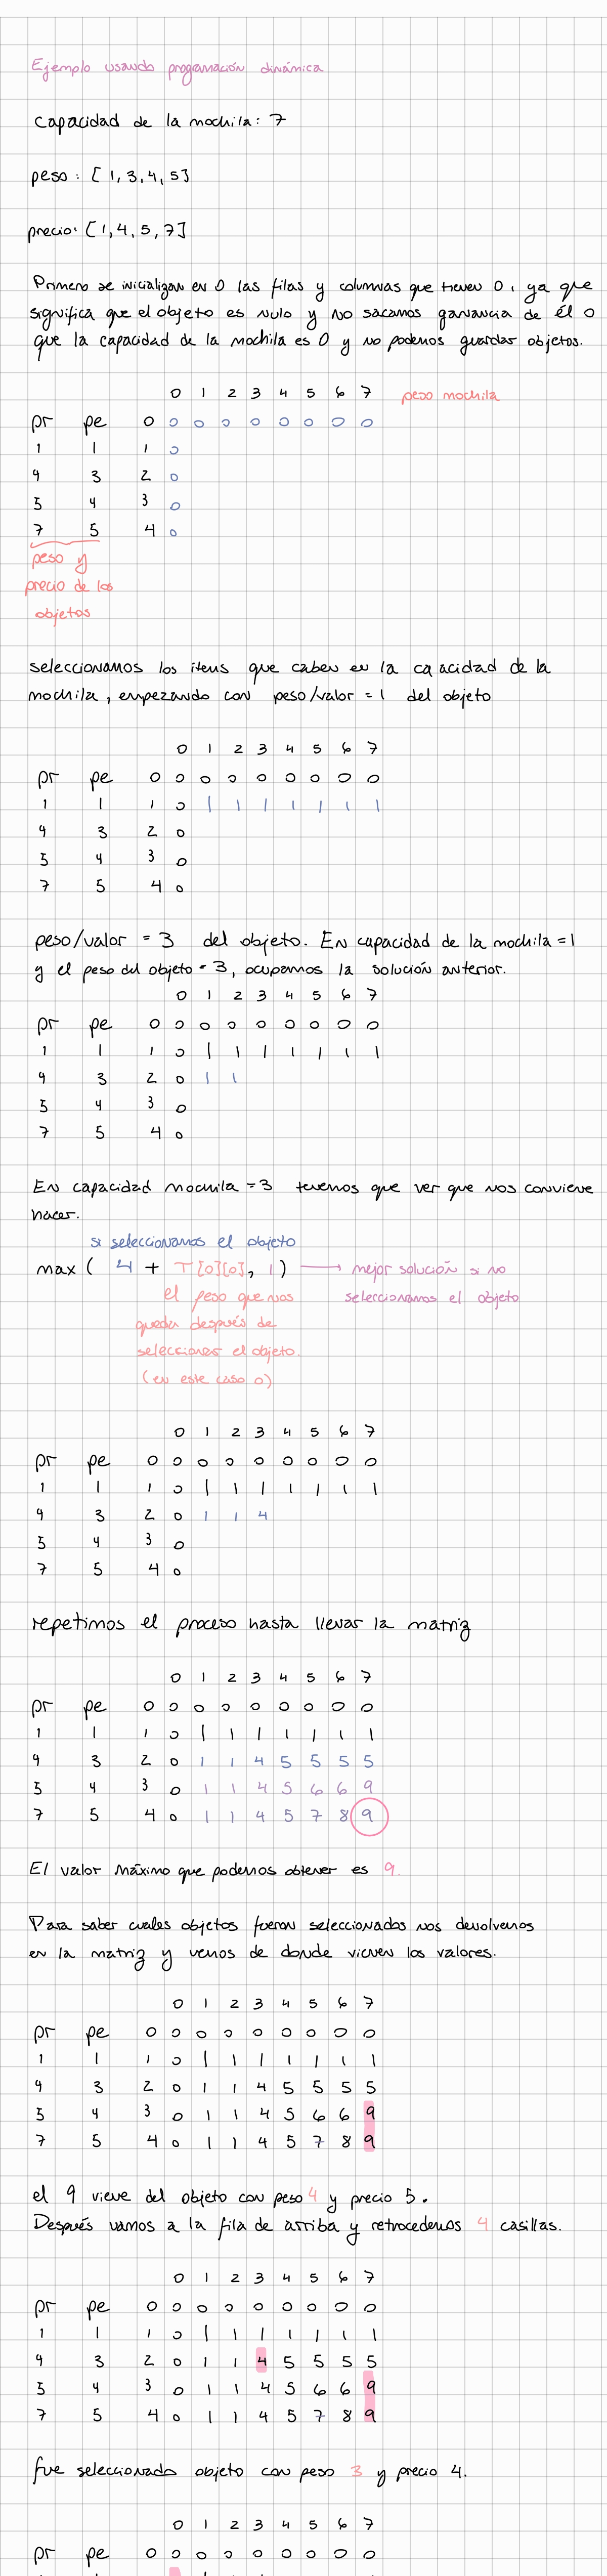

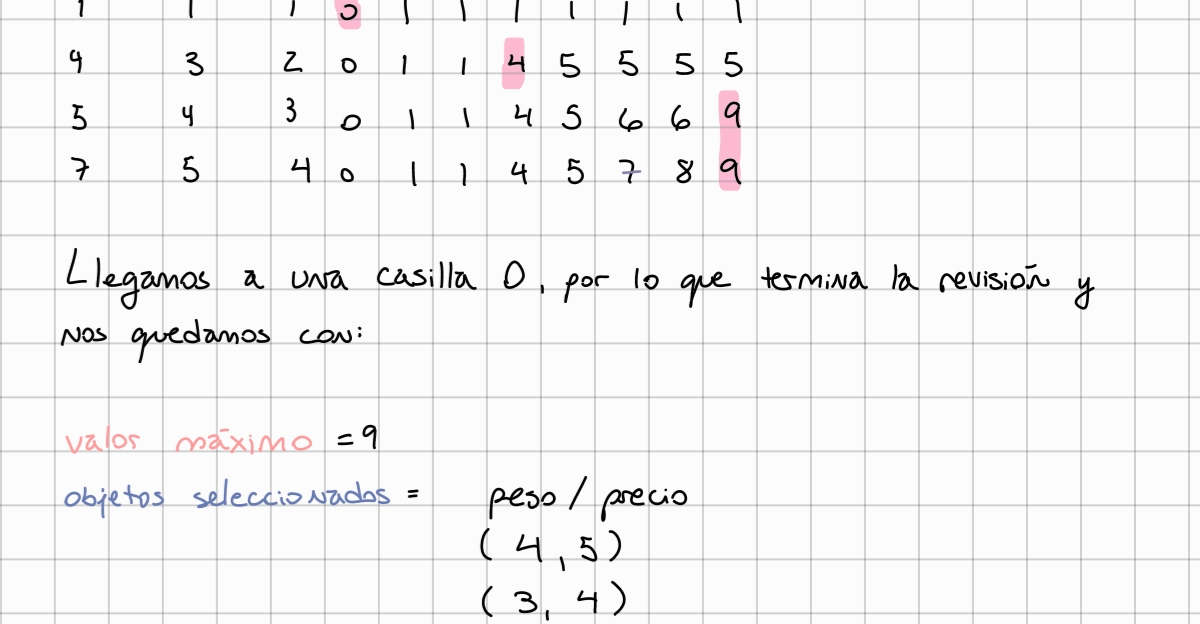

## 2.4. Ejecución del algoritmo paso a paso $(verbose = True)$

Utilizando la opción `verbose = True`, podemos ver lo que ocurre en cada iteración del algoritmo.

### Knapsack Dinámico

In [44]:
precio = [50, 100, 150]
po = [1, 2, 2]
peso = 5
n = len(precio)
cont = [0]
maximo = dynamicKnapSack(peso, po, precio, n, cont, verbose = True)

Caso base, por lo cual tab[0][0] = 0

Caso base, por lo cual tab[0][1] = 0

Caso base, por lo cual tab[0][2] = 0

Caso base, por lo cual tab[0][3] = 0

Caso base, por lo cual tab[0][4] = 0

Caso base, por lo cual tab[0][5] = 0


Caso base, por lo cual tab[1][0] = 0

Valor máximo obtenido de: 50 y 0...
El valor máximo se almacena en tab[1][1] = 50

Valor máximo obtenido de: 50 y 0...
El valor máximo se almacena en tab[1][2] = 50

Valor máximo obtenido de: 50 y 0...
El valor máximo se almacena en tab[1][3] = 50

Valor máximo obtenido de: 50 y 0...
El valor máximo se almacena en tab[1][4] = 50

Valor máximo obtenido de: 50 y 0...
El valor máximo se almacena en tab[1][5] = 50


Caso base, por lo cual tab[2][0] = 0

El objeto 2 > 1 no cabe en la mochila, por lo que tomamos la solución anterior tab[1][1]: 50

Valor máximo obtenido de: 100 y 50...
El valor máximo se almacena en tab[2][2] = 100

Valor máximo obtenido de: 150 y 50...
El valor máximo se almacena en tab[2][3] = 150

Valor máximo 

### Knapsack Greedy

In [32]:
precio = [50, 100, 150]
po = [10, 20, 30]
peso = 50
n = len(precio)
cont = [0]
maximo = greedyKnapSack(peso, po, precio, n, cont, verbose = True)

Datos de entrada...
Arreglo de precios: [50, 100, 150]
Arreglo de pesos: [10, 20, 30]
Capacidad máxima de la mochila: 50

Comparando el peso del objeto actual con la capacidad máxima de la mochila...
El objeto cabe en la mochila: 10 <= 50
La ganancia máxima actual es: 50
La capacidad actual de la mochila es: 40

Comparando el peso del objeto actual con la capacidad máxima de la mochila...
El objeto cabe en la mochila: 20 <= 40
La ganancia máxima actual es: 150
La capacidad actual de la mochila es: 20

El objeto no cabe en la mochila: 30 > 20

La ganancia máxima obtenida es: 150


#**3. Tiempo de ejecución**

## Tiempo de ejecución Programación Dinámica

**Teorema**: El algoritmo DP 0-1 tiene un tiempo de ejecución $O(nm)$

**Prueba del teorema**:

Es sabido que el tiempo de ejecución de un algoritmo de
programación está directamente relacionado con la resolución de subproblemas y el tiempo que toma resolver cada uno. Al utilizar memoización para resolver el
problema actual en base a los subproblemas se sabe que el costo de resolver un (sub-problema) es constante $O(1)$ y que cada subproblema se resuelve una única vez. De esto se obtiene que 

$$
T(n, m) = O(1) \cdot C(n, m)
$$

Siendo $C(n, m)$ la cantidad de subproblemas a resolver.

Para cada elemento en el rango $1..n$ el peso puede variar en el rango $1..m$, de forma que

$$
C(n,m)=nm
$$

Por lo que $T(n, m) = O(nm)$.

## Tiempo de ejecución Greedy

### Prueba del teorema

Ordenar los valores de mayor a menor tiene un costo de $O(n(log(n)))$, ya que se utiliza **QuickSort**.

Por otro lado obtener la solución óptima tiene un costo de $O(n)$.

Por lo que la cota asintótica del algoritmo 0-1 greedy es $O(n \cdot log (n))$.

# **4. Correctitud**

## KnapSack **Dinámico** 

**Hipótesis**: El algoritmo retorna una ganancia óptima correctamente de manera que la suma total de los valores de los elementos sea máxima.

Casos base: $P[0,j] \lor P[i,0]$ tamaño de mochila cero o ausencia de elementos, se resuelve un subproblema de tamaño cero con un valor cero.

El algoritmo resuelve los sub-problemas de la mochila de manera óptima de forma que la ganancia es máxima. Una vez son resueltos todos los subproblemas es posible solucionar el problema inicial $P(m,n)$

**Paso inductivo:** El algoritmo resuelve correctamente $P(m' < m, n)$ en base de los subproblemas de menor tamaño que ya han sido resueltos.

Gracias a la estructura óptima del problema se sabe que si $m'$ es correcto, $m$ también lo es.


## KnapSack **Greedy** 

**Hipótesis**: El algoritmo **no otorga** siempre el resultado óptimo.

El algoritmo greedy agrega los objetos en un orden de mayor a menor, ordenados en base a su proporcion **precio/peso**. Por lo cual al tomar siempre una decisión **greedy**, la cual puede no ser la mejor a largo plazo conlleva a que el algoritmo no siempre entregue el valor máximo. Además, a pesar de que el algoritmo vea todas las opciones posibles este no ve todas las **combinaciones** posibles.

A continución se presenta un ejemplo demuestra la incorrectitud:

Se considera una mochila de capacidad $m=30 \space kg$ y la siguiente tabla de
elementos de entrada

|$i$|$p \space \text {(kg)}$|$v \space \text {(\$)}$|
|---|---|---|
|0|5|50|
|1|20|140|
|2|10|60|


Al utilizar un enfoque greedy, se elegirían los dos primeros elementos en el
orden descendente por el ratio, correspondiente a los dos primeros elementos,
generando una ganancia de $\$190$. Sin embargo la solución óptima a este problema consiste en la elección de los dos últimos elementos, con una ganancia óptima de $\$200$.

# **5. Experimentos.**

## **5.1 Comparación de tiempo de ejecución Greedy v/s Dinámico**

En el siguiente gráfico se compara el tiempo de ejecución del algoritmo **knapSack** para su implementación ocupando programación dinámica y greedy en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $100$.

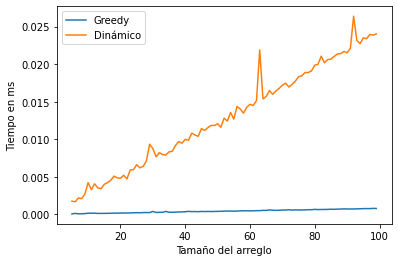

In [6]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
  
x=[]; y=[]
y1=[]
for n in range(5, 100):

  precio = random.sample(range(1, 100), n)
  po = random.sample(range(1, 100), n)
  peso = 50
  cont = [0]
  t1 = repeat(setup="from __main__ import greedyKnapSack", stmt=f"greedyKnapSack({peso}, {po}, {precio}, {n}, {cont})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import dynamicKnapSack", stmt=f"dynamicKnapSack({peso}, {po}, {precio}, {n}, {cont})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Greedy", "Dinámico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Como se puede apreciar en el gráfico, el algoritmo en su versión greedy es evidentemente mucho más eficiente que su versión dinámica. Esto se debe a que  si la variable $peso$ es mucho mayor a $log(n)$, lo cual ocurre en la mayoría de casos, su ejecución es bastante más lenta. Se puede agregar que la mochila tiende a almacenar una gran cantidad de elementos, por lo cual $m$ tiende a ser mayor que $log(n)$.


## **5.2.Cantidad de subproblemas resueltos**

En el siguiente grafico se observa la cantidad de subproblemas que resuelve el algoritmo **KnapSack** en su versión dinámica en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $100$.

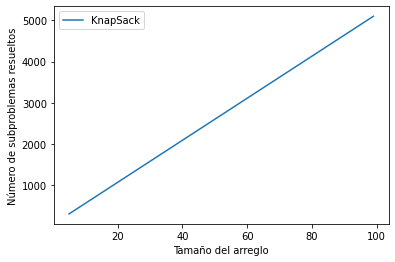

In [8]:
x=[]; y=[]

for n in range(5,100):

  precio = random.sample(range(1, 100), n)
  po = random.sample(range(1, 100), n)
  peso = 50
  cont = [0]
  dynamicKnapSack(peso, po, precio, n, cont)
  x.append(n)
  y.append(cont[0])


plt.plot(x, y)
plt.legend(["KnapSack"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Número de subproblemas resueltos')
plt.show()

### Análisis de resultados

Del gráfico se puede deducir que la cantidad de subproblemas resueltos es directamente proporcional al tamaño del arreglo multiplicado por el peso que soporta la mochila. 

Para complementar esto, el peso que aguanta la mochila es una constante en el gráfico (50), podemos comprobar que cuando $n = 100$  el número de subproblemas que resuelve el algoritmo es $50*100$ y de resultado obtenemos $5000$, como se aprecia en el gráfico. 

## **5.3.Cantidad de Iteraciones**

En el siguiente grafico se observa la cantidad de iteraciones realizadas por el algoritmo **KnapSack** en su versión greedy en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $100$.

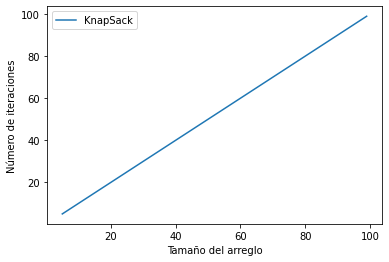

In [9]:
x=[]; y=[]

for n in range(5,100):

  precio = random.sample(range(1, 100), n)
  po = random.sample(range(1, 100), n)
  peso = 50
  cont = [0]
  greedyKnapSack(peso, po, precio, n, cont)
  x.append(n)
  y.append(cont[0])


plt.plot(x, y)
plt.legend(["KnapSack"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Número de iteraciones')
plt.show()

### **Análisis de resultados**



En el gráfico se ve claramente que la cantidad de iteraciones es directamente proporcional al tamaño de entrada, ya que el algoritmo *Greedy* recorre todos los elementos de la mochila. También se puede decir que la cantidad de iteraciones es lineal $O(n)$.

## **5.4. Comparación de valores obtenidos por ambos algoritmos**

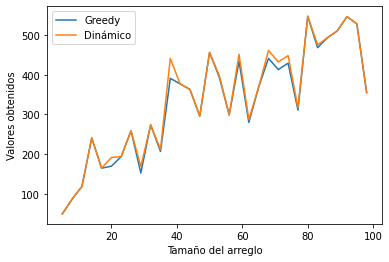

In [12]:
x=[]; y=[]
y1 = []

for n in range(5,100, 3):

  precio = random.sample(range(1, 100), n)
  po = random.sample(range(1, 100), n)
  peso = 50
  cont = [0]
  greedy = greedyKnapSack(peso, po, precio, n, cont)
  dynamic = dynamicKnapSack(peso, po, precio, n, cont)
  x.append(n)
  y.append(greedy)
  y1.append(dynamic)

plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Greedy", "Dinámico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Valores obtenidos')
plt.show()

### Análisis de resultados

En el gráfico se aprecia que los valores entregados por ambas versiones son casi idénticos, pero la versión *Greedy* falla en una parte de los casos al no encontrar el valor máximo. Esto se debe a que el algoritmo no realiza todas las combinaciones posibles como su versión dinámica, pero de igual manera se le puede considerar que entrega un valor cercano al óptimo. 

En este gráfico queda en evidencia que la versión *Greedy* no es correcta, ya que en la mayoría de casos no entrega el valor óptimo.